#K-Means Kaggle

In [1]:
# Instalação do pandas-profiling
#!pip install pandas-profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import scipy as sci
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport  # pandas-profiting é mais intuitivo 

In [3]:
# Verificar diretório local
import os
cwd = os.getcwd()
cwd

'D:\\Projetos\\_IGTI\\Modulo01\\Testes_KMeans'

In [4]:
# Leitura do arquivo csv e cria o dataframe
base_vendas = pd.read_csv(cwd + '/DADOS/Mall_Customers.csv')

In [5]:
# Verificar os 5 primeiros registros
base_vendas.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Como estão os campos e colunas
base_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Estatística
base_vendas.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Tipos dos dados
base_vendas.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
profile = ProfileReport(base_vendas , title = 'Relatório - Pandas Profiling'  , html = { 'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_file("K-Means.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Visializar as colunas para pegar os nomes da coluna
base_vendas.head(n=3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


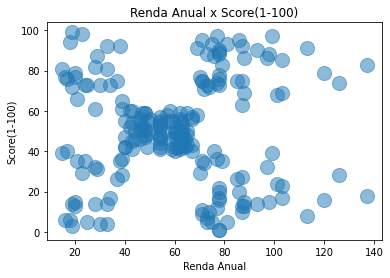

In [12]:
# Plotar 
plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)', data= base_vendas , s=200, alpha= 0.5)
plt.title('Renda Anual x Score(1-100)')
plt.xlabel('Renda Anual')
plt.ylabel('Score(1-100)')
plt.show()

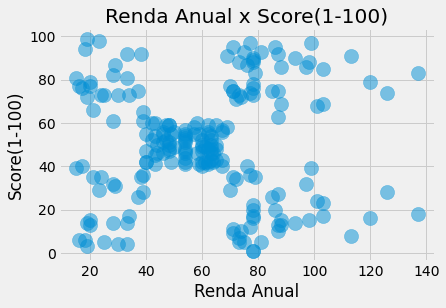

In [13]:
# Plotar Plus
plt.style.use('fivethirtyeight')
plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)', data= base_vendas , s=200, alpha= 0.5)
plt.title('Renda Anual x Score(1-100)')
plt.xlabel('Renda Anual')
plt.ylabel('Score(1-100)')
plt.show()

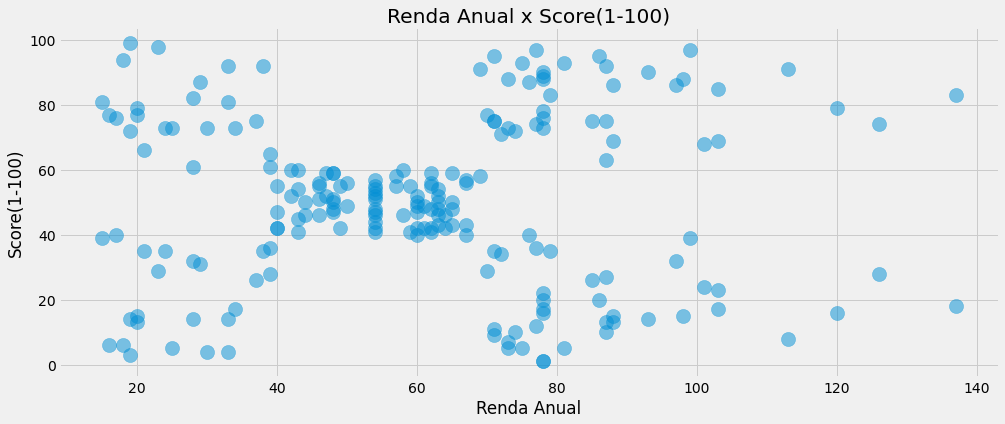

In [14]:
# Plotar Plus +
plt.style.use('fivethirtyeight')
plt.figure( 1, figsize=[15,6])
plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)', data= base_vendas , s=200, alpha= 0.5)
plt.title('Renda Anual x Score(1-100)')
plt.xlabel('Renda Anual')
plt.ylabel('Score(1-100)')
plt.show()

In [16]:
# Configurar para utilizar o K-Means
x2 = base_vendas[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x2)


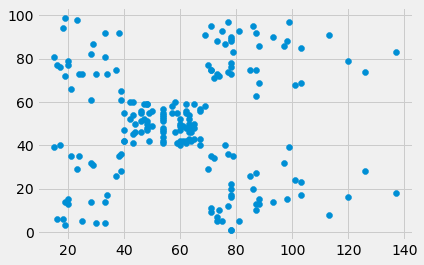

In [17]:
plt.scatter(x = x2[:,0] , y = x2[:,1])

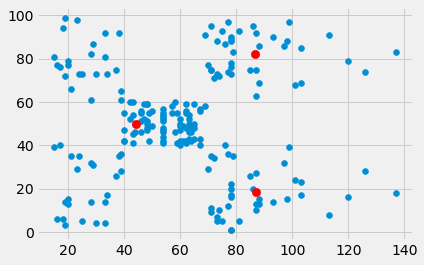

In [18]:
plt.scatter(x = x2[:,0] , y = x2[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s=70 , c='red')
plt.show()

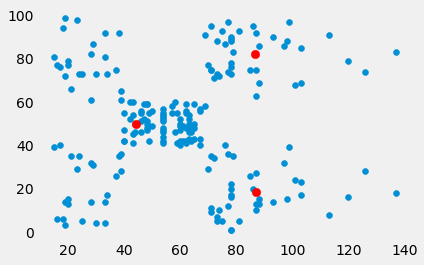

In [19]:
plt.scatter(x = x2[:,0] , y = x2[:,1])
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s=70 , c='red')
plt.show()

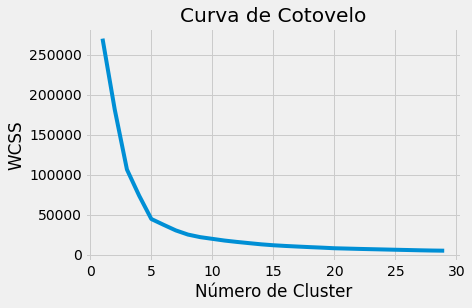

In [20]:
wcss = []
for i in range(1,30):
	kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=100)
	kmeans.fit(x2)
	wcss.append(kmeans.inertia_)

plt.plot(range(1,30),wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Número de Cluster')
plt.ylabel('WCSS')
plt.show()


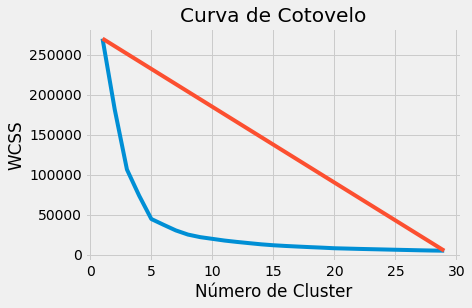

In [21]:
plt.plot(range(1,30),wcss)
plt.plot([1,29], [wcss[0],wcss[len(wcss)-1]])
plt.title('Curva de Cotovelo')
plt.xlabel('Número de Cluster')
plt.ylabel('WCSS')
plt.show()


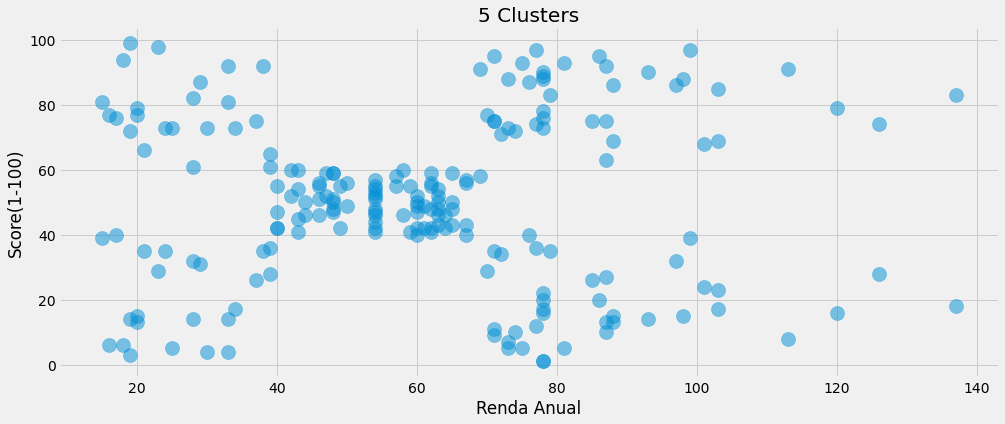

In [22]:
# Metodo cotovelo identifico 5 clusters
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, init = 'kmeans++'   )
pred_y = KMeans(x2)

plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x2[0:,0], x2[0:,1] , s=200, alpha= 0.5)
plt.title('5 Clusters')
plt.xlabel('Renda Anual')
plt.ylabel('Score(1-100)')
plt.show()

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]
44448.45544793369


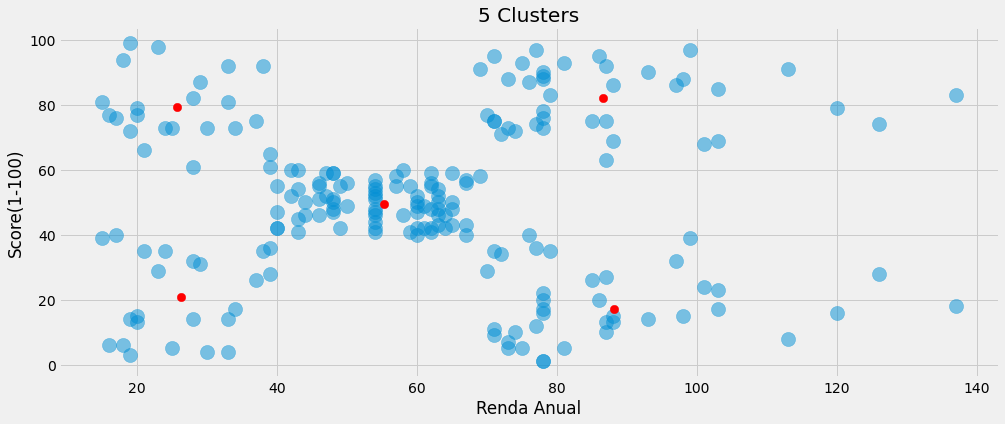

In [23]:
# Metodo cotovelo identifico 5 clusters
x2 = base_vendas[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, init = 'k-means++'   )
pred_y = kmeans.fit_predict(x2)

print(kmeans.cluster_centers_)
print(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x2[0:,0], x2[0:,1] , s=200, alpha= 0.5)
#plt.scatter(kmeans.clusters_center_[0:,0], kmeans.clusters_center_[0:,1] , s=70, c='red')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s=70 , c='red')
plt.title('5 Clusters')
plt.xlabel('Renda Anual')
plt.ylabel('Score(1-100)')
plt.show()